# KoNLPy 형태소 분석기

참고

- [한국어 형태소 분석기 체험 및 비교(Okt, Mecab, Komoran, Kkma)](https://soohee410.github.io/compare_tagger)

#### MeCab

- 잘게 자른다. 매우 빠르다(압도적). C++ 기반. 
- Elasticsearch 의 Nori 토크나이저도 mecab-ko-dic 사전을 사용함
- KoNLPy 외에 사전 설치 필요

```bash
# MeCab 사전 설치
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
```

#### Okt

- 스테밍 기능이 있다. 적당히 정교하다. 속도도 준수한편
- 트위터에서 만든 오픈소스 한국어 처리기 tweeter-korean-text 사전을 이어받아 만들어짐

## Mecab

In [ ]:
mecab.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NNB': '의존 명사',
 'NNBC': '단위를 나타내는 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'SC': '구분자 , · / :',
 'SE': '줄임표 …',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SSC': '닫는 괄호 ), ]',
 'SSO': '여는 괄호 (, [',
 'SY': '기타 기호',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [ ]:
# MeCab 테스트
from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.morphs(u'영등포구청역에 있는 맛집 좀 알려주세요.'))
# ['영등포구청역', '에', '있', '는', '맛집', '좀', '알려', '주', '세요', '.']
print(mecab.nouns(u'우리나라에는 무릎 치료를 잘하는 정형외과가 없는가!'))
# ['우리', '나라', '무릎', '치료', '정형', '외과']
print(mecab.pos(u'자연주의~ 별로에요 ㅎㅎ ㅠㅠㅠㅠㅜ	(쇼핑[몰])은 어떤 곳인가? 알파벳, alphabet, 1234.'))
# [('자연주의', 'NNG'), ('쇼핑몰', 'NNG'), ('은', 'JX'), ('어떤', 'MM'), ('곳', 'NNG'), ('인가', 'VCP+EF'), ('?', 'SF')]

['영등포구청역', '에', '있', '는', '맛집', '좀', '알려', '주', '세요', '.']
['우리', '나라', '무릎', '치료', '정형', '외과']
[('자연주의', 'NNG'), ('~', 'SY'), ('별로', 'MAG'), ('에요', 'JX'), ('ㅎㅎ', 'IC'), ('ㅠㅠㅠㅠㅜ', 'UNKNOWN'), ('(', 'SSO'), ('쇼핑', 'NNG'), ('[', 'SSO'), ('몰', 'NNG'), (']', 'SSC'), (')', 'SSC'), ('은', 'JX'), ('어떤', 'MM'), ('곳', 'NNG'), ('인가', 'VCP+EF'), ('?', 'SF'), ('알파벳', 'NNG'), (',', 'SC'), ('alphabet', 'SL'), (',', 'SC'), ('1234', 'SN'), ('.', 'SF')]


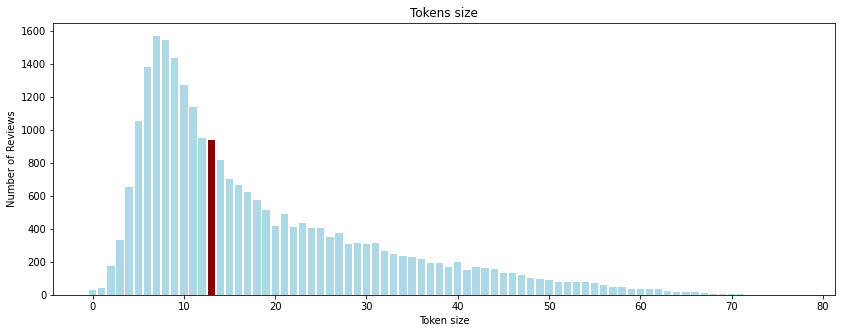

In [ ]:
import matplotlib.pyplot as plt

# 중간값(13)만 빨간색
colors = [ 'lightblue' if x != 13 else 'darkred' for x in x_values ]

plt.figure(figsize = (14, 5))
plt.bar(x_values, y_values, color=colors)
plt.title("Tokens size")
plt.xlabel("Token size")
plt.ylabel("Number of Reviews")
plt.show()

## Okt

In [ ]:
# Okt 의 태그셋
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
# Okt 테스트
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs(u'영등포구청역에 있는 맛집 좀 알려주세요.'))
# ['영등포', '구청', '역', '에', '있는', '맛집', '좀', '알려주세요', '.']
print(okt.nouns(u'우리나라에는 무릎 치료를 잘하는 정형외과가 없는가!'))
# ['우리나라', '무릎', '치료', '정형외과']
print(okt.pos(u'자연주의~ 별로에요 ㅎㅎ ㅠㅠㅠㅠㅜ (쇼핑[몰])은 어떤 곳인가?'))
# [('자연', 'Noun'), ('주의', 'Noun'), ('쇼핑몰', 'Noun'), ('은', 'Josa'), ('어떤', 'Adjective'), ('곳', 'Noun'), ('인가', 'Josa'), ('?', 'Punctuation')]

['영등포', '구청', '역', '에', '있는', '맛집', '좀', '알려주세요', '.']
['우리나라', '무릎', '치료', '정형외과']
[('자연', 'Noun'), ('주의', 'Noun'), ('~', 'Punctuation'), ('별로', 'Noun'), ('에요', 'Josa'), ('ㅎㅎ', 'KoreanParticle'), ('ㅠㅠㅠㅠㅜ', 'KoreanParticle'), ('(', 'Punctuation'), ('쇼핑', 'Noun'), ('[', 'Punctuation'), ('몰', 'Verb'), ('])', 'Punctuation'), ('은', 'Noun'), ('어떤', 'Adjective'), ('곳', 'Noun'), ('인가', 'Josa'), ('?', 'Punctuation')]


In [ ]:
print(okt.pos(u'제품이 별로에요 좋아요 좋아용 조은 좋은 했는데 빠르고 샀는데 하세요 없고 했습니다 좋네요 나빠요', norm=True, stem=True))

[('제품', 'Noun'), ('이', 'Josa'), ('별로', 'Noun'), ('에요', 'Josa'), ('좋다', 'Adjective'), ('좋다', 'Adjective'), ('좋다', 'Adjective'), ('좋다', 'Adjective'), ('하다', 'Verb'), ('빠르다', 'Adjective'), ('사다', 'Verb'), ('하다', 'Verb'), ('없다', 'Adjective'), ('하다', 'Verb'), ('좋다', 'Adjective'), ('나쁘다', 'Adjective')]


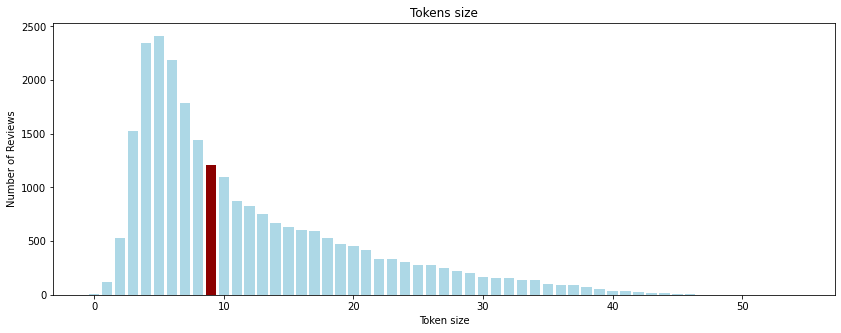

In [ ]:
import matplotlib.pyplot as plt

# 중간값(9)만 빨간색
colors = [ 'lightblue' if x != 9 else 'darkred' for x in x_values ]

plt.figure(figsize = (14, 5))
plt.bar(x_values, y_values, color=colors)
plt.title("Tokens size")
plt.xlabel("Token size")
plt.ylabel("Number of Reviews")
plt.show()

- - -

- - -

# 실험 결과

## 데이터셋

- train.csv : 25000건
  - reviews: 구어체 문장
  - target: 정수형 1~5 (평점3 데이터는 제거됨)  
- test.csv : 25000건
  - reviews: 구어체 문장
  - target: 없음 (제출용)  

## 전처리 (노이즈 제거)

- 한글 자모음 찾아보기 ==> 4584
- 영어 찾아보기 ==> 537
- 숫자 찾아보기 ==> 2425
- 특수문자 찾아보기 ==> 13360
- 웹주소 찾아보기 ==> 2
- 이메일 찾아보기 ==> 0
- 전화번호 찾아보기 ==> 4


## 회귀 모델

- LogisticRegression
- LightBGM

## DNN 모델 

- LSTM/BiLSTM
- 1D CNN

## Transformer 모델 (Hugging Face)

- ELECTRA
  - 한국어 모델 KcELECTRA

## Okt_stem + TfidfVectorizer + LogisticRegression

- 전처리: 한글만 남기고 모두 제거, 한글자 리뷰 제거 (drop=12행)
- 토큰화: Okt.pos(stem=True)
- 데이터 분할: train(80%)+valid(20%)
- 벡터화: TfidfVectorizer(ngram_range=(1,2), min_df=2)
- 모델 &nbsp: LogisticRegression(solver='liblinear')
  - valid_acc = 0.647


In [ ]:
# 훈련
lr_clf.fit(X_train_vec, y_train)
# 평가
pred = lr_clf.predict(X_valid_vec)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(metrics.accuracy_score(y_valid, pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.647
